In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d niteshfre/chessman-image-dataset

 94% 54.0M/57.6M [00:00<00:00, 69.9MB/s]
100% 57.6M/57.6M [00:00<00:00, 68.1MB/s]


In [ ]:
!unzip "/content/chessman-image-dataset.zip" -d "/content/dataset"

In [7]:
train_dic = "/content/dataset/Chessman-image-dataset/Chess/"
class_name = ["Bishop","King","Knight","Pawn","Queen","Rook"]
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dic,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_name,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256,256),
    shuffle = True,
    seed = 99
)

Found 552 files belonging to 6 classes.


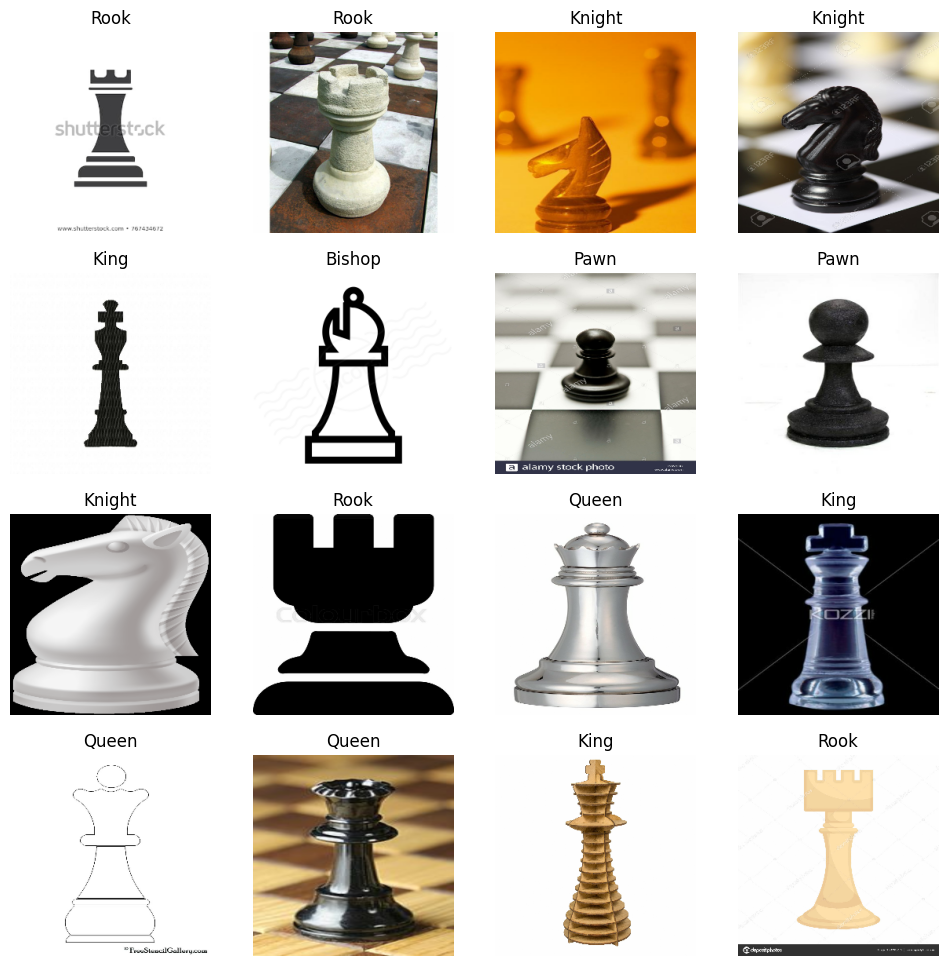

In [8]:
plt.figure(figsize = (12,12))
for images , label in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title(class_name[tf.argmax(label[i],axis = 0).numpy()])
    plt.axis("off")


In [9]:
train_dataset = (
    train_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(6,activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [14]:
history = model.fit(
    train_dataset,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
18/18 [==============================] - 5s 113ms/step - loss: 0.4002 - accuracy: 0.8279
Epoch 2/5
18/18 [==============================] - 4s 146ms/step - loss: 0.3602 - accuracy: 0.8587
Epoch 3/5
18/18 [==============================] - 4s 115ms/step - loss: 0.3058 - accuracy: 0.8804
Epoch 4/5
18/18 [==============================] - 4s 112ms/step - loss: 0.3124 - accuracy: 0.8786
Epoch 5/5
18/18 [==============================] - 5s 157ms/step - loss: 0.2493 - accuracy: 0.9076


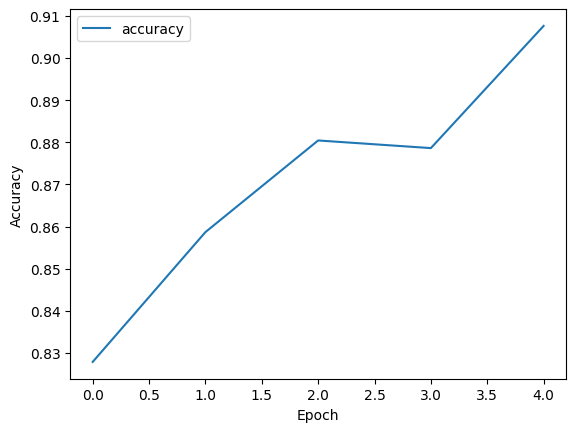

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

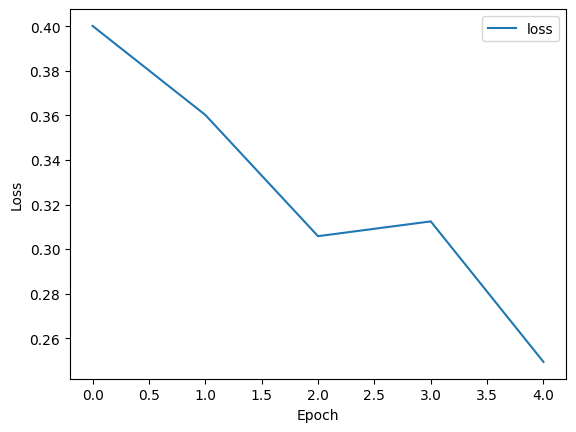

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()